MINI PROJECT

In [51]:
# importing libraries and dataset
from MakeDataset import X_train, X_test, y_train, y_test
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn import decomposition
import os
import tsfel

In [52]:
# Adjusting the shapes
X_train_flatted = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_flatted = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [53]:
# Creating DataFrames
X_train_df = pd.DataFrame(X_train_flatted)
y_train_df = pd.DataFrame(y_train, columns = ['Activity'])
Data = pd.concat([X_train_df, y_train_df], axis=1)

Question 1 : Plot the waveform for data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 colunms to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

Solution :

Lets first plot the waveforms. We plot the accelerations along x, y and z axes with respect to time for all the activities.

Legends : 
Red : Acceleration - x
Green : Acceleration - y
Blue : Acceleration - z


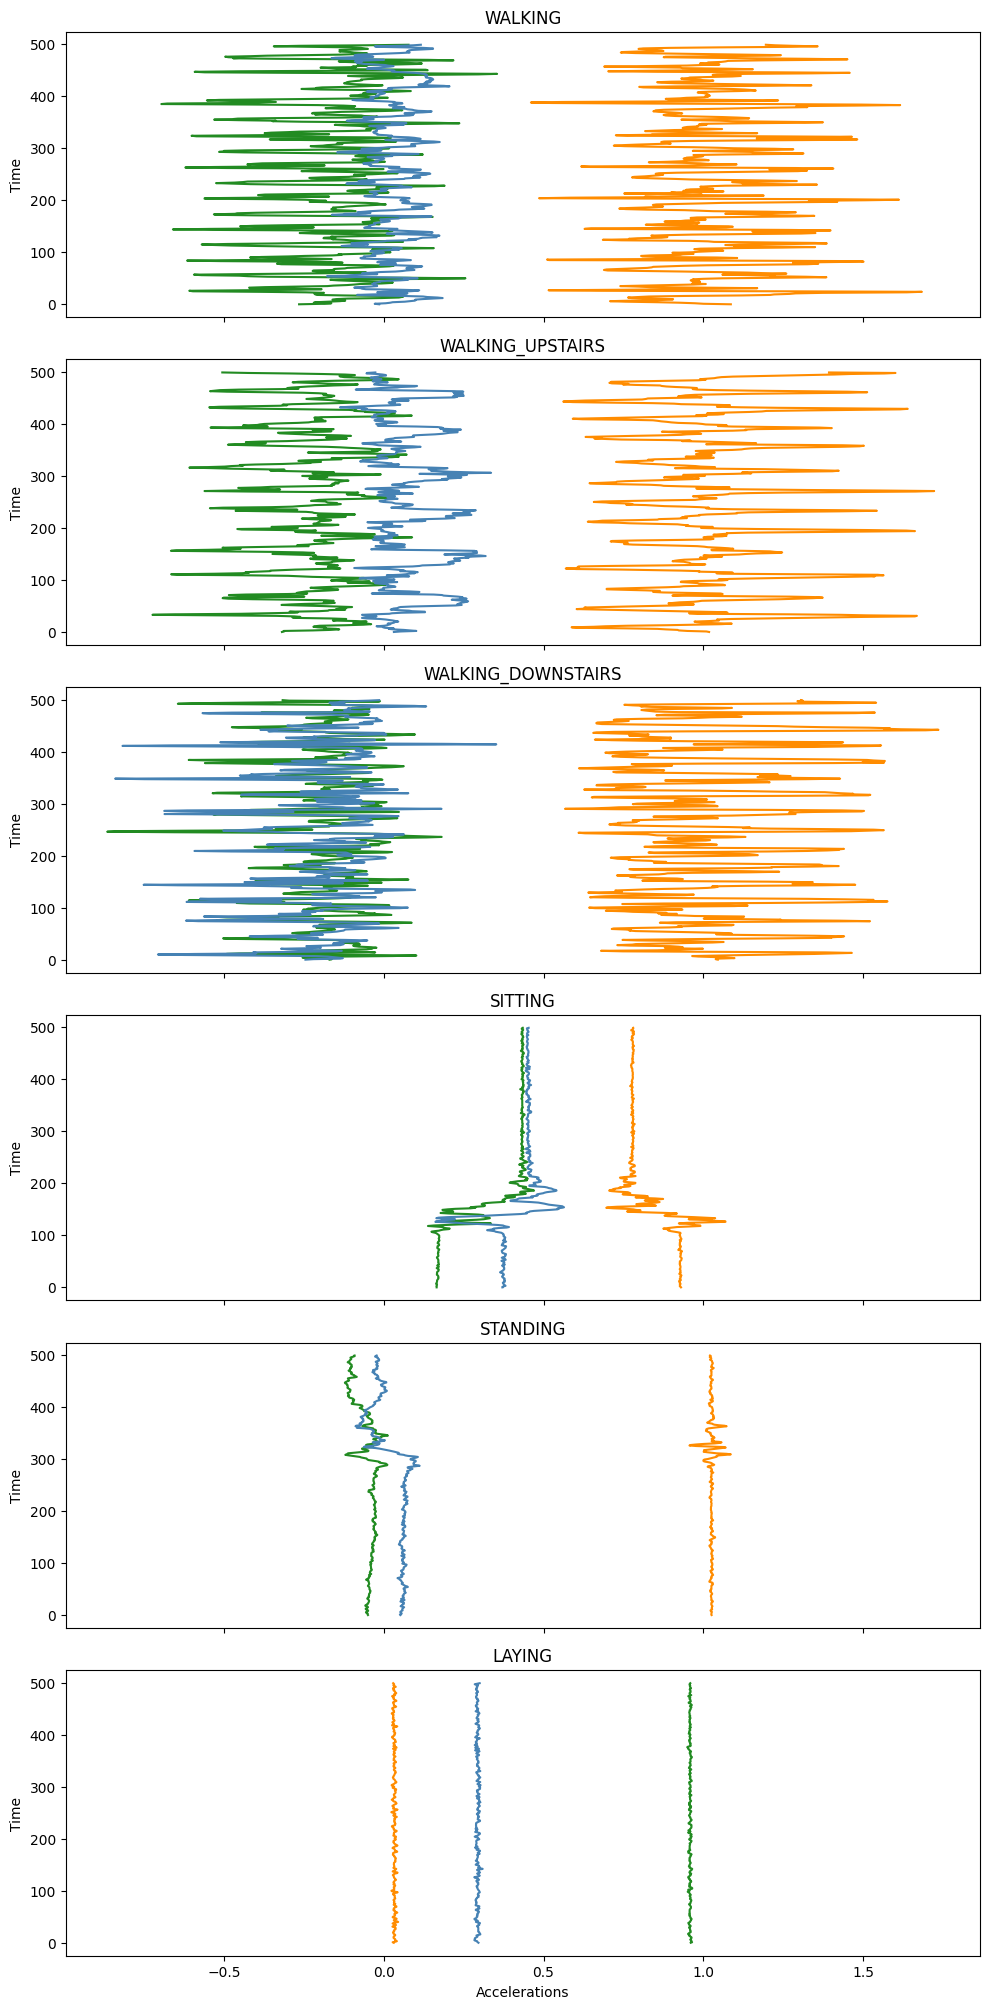

In [54]:
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
names = list(classes.keys())
values = list(classes.values())

def get_activity_name(i):
    return names[values.index(i)]
print("Legends : ")

print("Red : Acceleration - x")
print("Green : Acceleration - y")
print("Blue : Acceleration - z")
fig, axes = plt.subplots(6, 1, sharex=True, figsize = (10,20))
nof_participants = 1
for j in range(len(classes)):
    ind = Data.where(Data['Activity'] == j+1).dropna().index[0:nof_participants]
    axes[j].set_title(get_activity_name(j+1))
    for i in range(nof_participants):
        time = np.arange(i * len(X_train[0][:, 0]), i * len(X_train[0][:, 0]) + len(X_train[0][:, 0]))
        axes[j].plot(X_train[ind[i]][:, 0], time, c='darkorange')
        axes[j].plot(X_train[ind[i]][:, 1], time, c='forestgreen')
        axes[j].plot(X_train[ind[i]][:, 2], time, c='steelblue')
        axes[j].set_ylabel("Time")
plt.tight_layout()  
plt.xlabel("Accelerations")
plt.show()

Clearly, there is correlation between the accelartions and the activity performed by the participant. Model (we intend to use in next questions) will be able to classify the activities because of this strong correlation.

Question 2 : Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration $(acc_x^2+acc_y^2+acc_z^2)$ for each activity and justify your answer.

Solution : \
We first compute linear accelerations for each datasample and plot in following cells.

In [55]:
# Creating Acceleration Data

X_train_netacc = np.empty([X_train.shape[0],X_train.shape[1]])

for i in range(X_train_netacc.shape[0]):
    for j in range(X_train_netacc.shape[1]):
        X_train_netacc[i][j] = np.sum(X_train[i][j]**2)

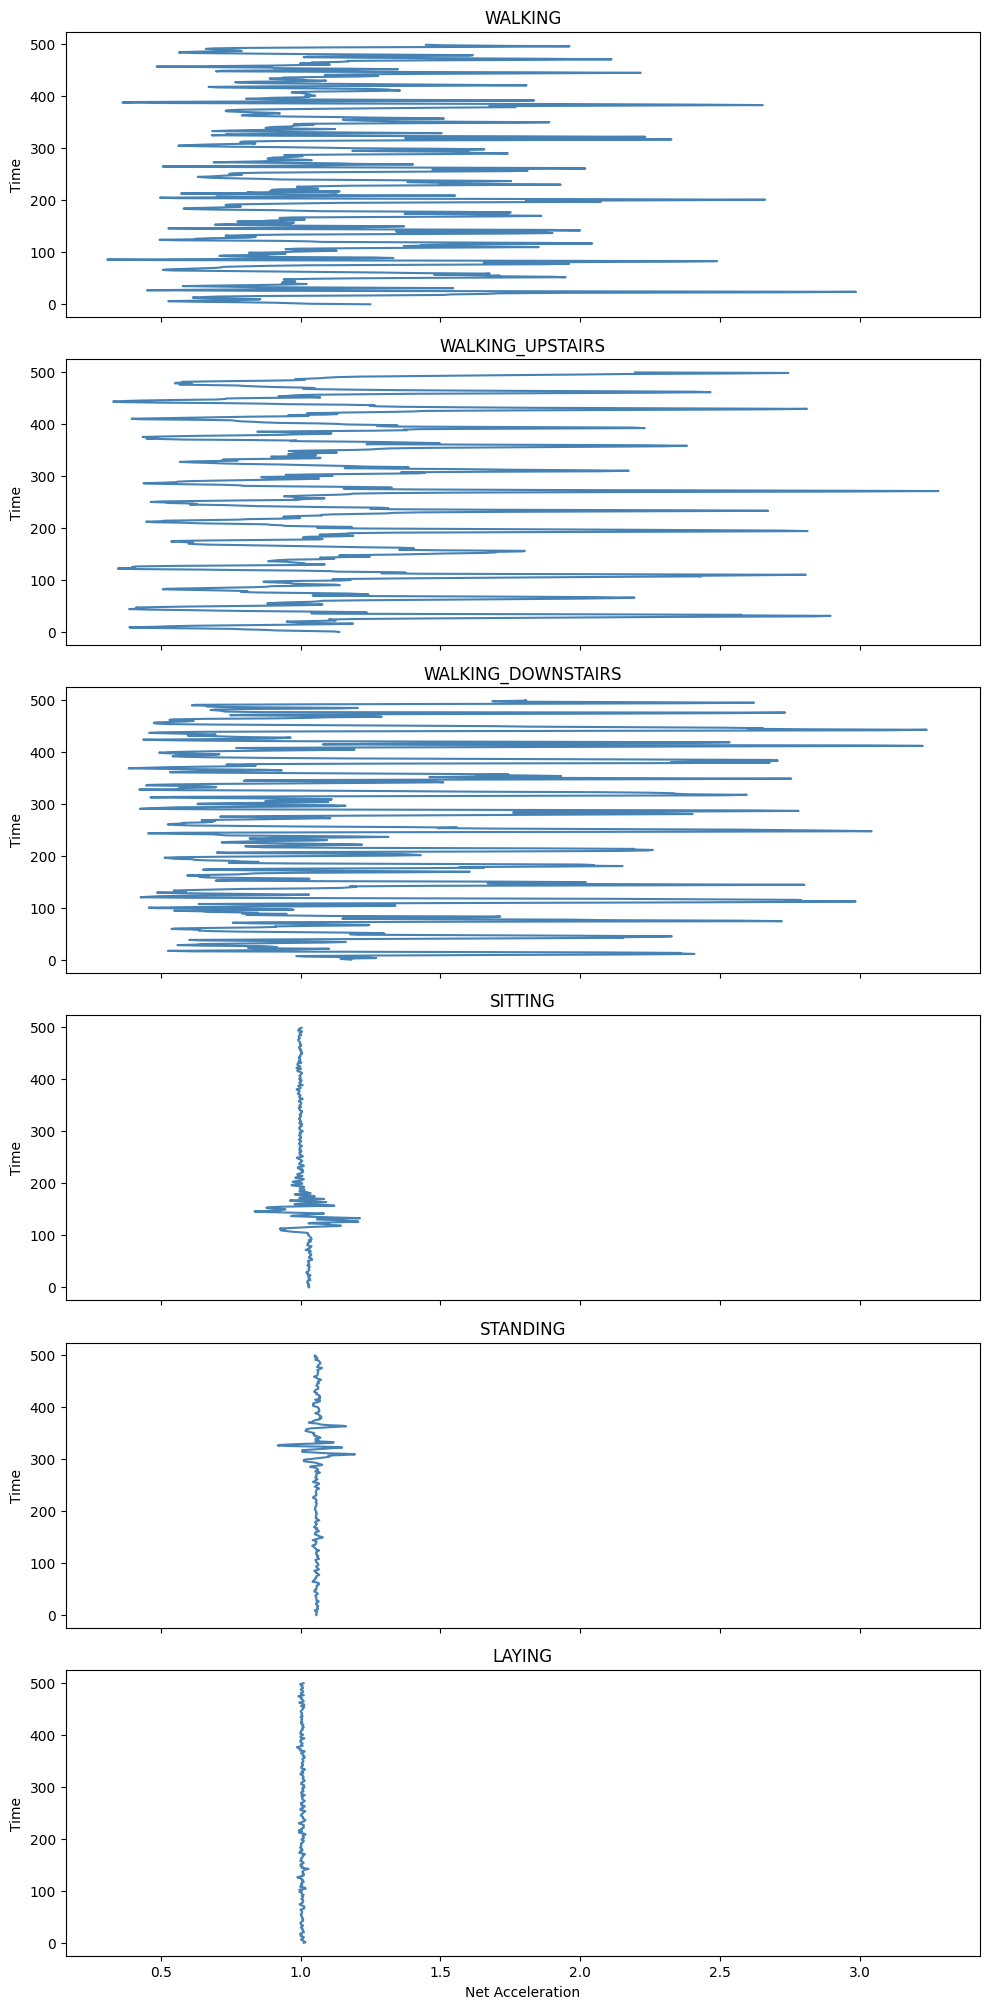

In [56]:
# Plotting
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
names = list(classes.keys())
values = list(classes.values())

def get_activity_name(i):
    return names[values.index(i)]

fig, axes = plt.subplots(6, 1, sharex=True, figsize = (10,20))
nof_participants = 1
for j in range(len(classes)):
    ind = Data.where(Data['Activity'] == j+1).dropna().index[0:nof_participants]
    axes[j].set_title(get_activity_name(j+1))
    for i in range(nof_participants):
        time = np.arange(i * len(X_train[0][:, 0]), i * len(X_train[0][:, 0]) + len(X_train[0][:, 0]))
        net_acc = X_train_netacc[ind][0]
        axes[j].plot(net_acc, time, c='steelblue')
        axes[j].set_ylabel("Time")
plt.tight_layout()  
plt.xlabel("Net Acceleration")
plt.show()

We can see that Dynamic Activities : Walking, Walking_Upstairs and Walking_Downstairs have higher net accelration than Stactic acitivities : Sitting, Standing and Laying. Along with this, the dyanamic activities have much greater variance in the acceleration values. So, We can differentiate between the two categories of activites by comparing these stastical quantities without using a machine learning model. But, for predicting among the activities from same category we require a machine learning model.

Question 3 : Train Decision Tree using trainset and report Accuracy and confusion matrix using testset.

Solution : \
We use the sklearn implementation of Decision tree :

In [109]:
# Training the model
model = tree.DecisionTreeClassifier()
model.fit(X_train_flatted, y_train)

# Predicting on Test data
y_hat = model.predict(X_test_flatted)

# Printing accuracy and Confusion Matrix
print("Accuracy on Dataset : ",metrics.accuracy_score(y_test, y_hat))
print("\nConfusion Matrix :")
print(metrics.confusion_matrix(y_test, y_hat))

Accuracy on Dataset :  0.6944444444444444

Confusion Matrix :
[[2 2 1 1 0 0]
 [0 4 1 0 1 0]
 [3 0 1 0 2 0]
 [0 0 0 6 0 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]


The model is succesfully able to classify the Static activites but confuses among the dynamic activities.

Question 4 : Train Decision Tree with varrying depths (2-8) using trainset and report accuracy and confusion matrix using Test set. Does the accuracy changes when the depth is increased? Plot the accuracies and reason why such a result has been obtained.

Solution :

In [58]:
max_depth = 10
accuracies = np.empty(max_depth)
for i in range(max_depth):
    model = tree.DecisionTreeClassifier(max_depth=i+1)
    model.fit(X_train_flatted, y_train)
    y_hat = model.predict(X_test_flatted)
    accuracies[i] = (metrics.accuracy_score(y_test, y_hat))

In [59]:
accuracies

array([0.30555556, 0.5       , 0.55555556, 0.61111111, 0.55555556,
       0.63888889, 0.66666667, 0.66666667, 0.63888889, 0.58333333])

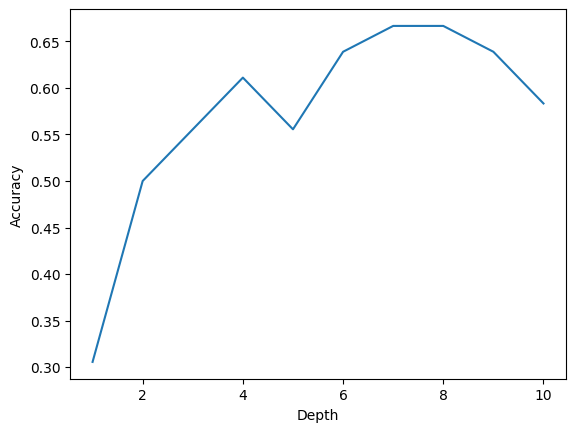

In [60]:
# Plotting
plt.plot(np.arange(1,11),accuracies)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

The plot shows the variation of Accuracies with respect to Depth. With increase in depth, accuracy first increases as it reduces the bias and reaches a maximum at depth = 7. But after that, it starts to reduce because it starts to overfit the data.

Question 5 : Use PCA (Principal Component Analysis) on Total Acceleration $(acc_x^2+acc_y^2+acc_z^2)$ to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities. Next, use [TSFEL](https://tsfel.readthedocs.io/en/latest/) ([a featurizer library](https://github.com/fraunhoferportugal/tsfel)) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities. Are you able to see any difference?

Solution :\
First, we use sklearn to apply PCA on Net Acceleration data computed previously.

In [61]:
# Applying PCA 
pca = decomposition.PCA(n_components=2)
X_train_netacc_pca = pca.fit_transform(X_train_netacc)
X_train_netacc_pca_df = pd.DataFrame(X_train_netacc_pca)

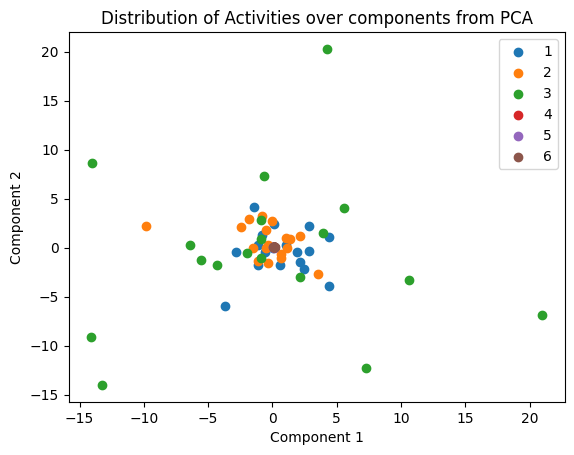

In [62]:
# Plotting 
X_train_netacc_pca_df = pd.DataFrame(X_train_netacc_pca)
Data_pca = pd.concat([X_train_netacc_pca_df, y_train_df], axis = 1)
for i in range(len(classes)):
    X = Data_pca.where(Data_pca['Activity'] == i+1).dropna()[0]
    Y = Data_pca.where(Data_pca['Activity'] == i+1).dropna()[1]
    plt.scatter(X,Y, label = f"{i+1}")
plt.legend()
plt.title("Distribution of Activities over components from PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

Here, there is not clear separation among the classes. So, we use the TSEFL to add more features to raw data.

Now, we use the TSEFL to add more features

In [ ]:
# Adding Features to train data 
cfg_file = tsfel.get_features_by_domain()
X_train_extended = []
for i in range(len(X_train)):
    X = tsfel.time_series_features_extractor(cfg_file, X_train[i][:], fs = 50, window_size = 250)
    X_train_extended.append(np.array(X.head(1)).reshape(X.head(1).shape[1]))
X_train_extended = np.array(X_train_extended)

In [ ]:
# Adding Features to test data 
cfg_file = tsfel.get_features_by_domain()
X_test_extended = []
for i in range(len(X_test)):
    X = tsfel.time_series_features_extractor(cfg_file, X_test[i][:], fs = 50, window_size = 250)
    X_test_extended.append(np.array(X.head(1)).reshape(X.head(1).shape[1]))
X_test_extended = np.array(X_test_extended)

In [65]:
X_train_extended_new = np.concatenate((X_train_flatted, X_train_extended), axis = 1)
X_test_extended_new = np.concatenate((X_test_flatted, X_test_extended), axis = 1)

In [66]:
# Applying PCA to extended data
pca = decomposition.PCA(n_components=2)
X_train_extended_new_pca = pca.fit_transform(X_train_extended_new)
X_train_extended_new_pca_df = pd.DataFrame(X_train_extended_new_pca)
Data_extended_pca = pd.concat([X_train_extended_new_pca_df, y_train_df], axis = 1)

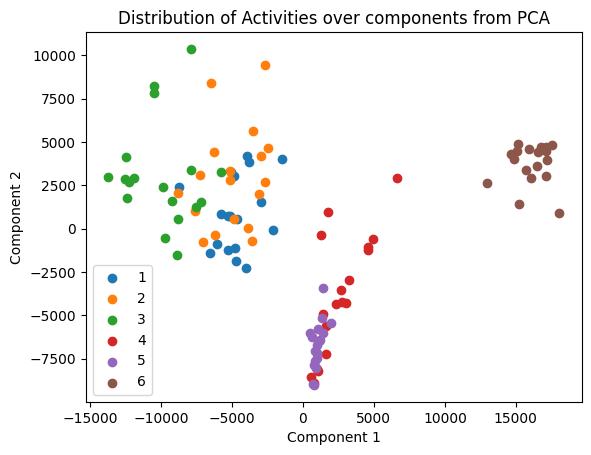

In [67]:
# Plotting
X_train_extended_new_pca_df = pd.DataFrame(X_train_extended_new_pca)
Data_extended_pca = pd.concat([X_train_extended_new_pca_df, y_train_df], axis = 1)
for i in range(len(classes)):
    X = Data_extended_pca.where(Data_extended_pca['Activity'] == i+1).dropna()[0]
    Y = Data_extended_pca.where(Data_extended_pca['Activity'] == i+1).dropna()[1]
    plt.scatter(X,Y, label = f"{i+1}")
plt.legend()
plt.title("Distribution of Activities over components from PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

There is clear separation among the classes.

Question 6 : Use the features obtained from TSFEL and train a Decision Tree. Report the accuracy and confusion matrix using test set. Does featurizing works better than using the raw data? Train Decision Tree with varrying depths (2-8) and compare the accuracies obtained in Q4 with the accuracies obtained using featured trainset. Plot the accuracies obtained in Q4 against the accuracies obtained in this question.

Solution : \
Now, we train the model on extended data.

In [72]:
# Training the model on Extended data using TSEFL
model = tree.DecisionTreeClassifier()
model.fit(X_train_extended_new, y_train)

# Predicting on Test Data
y_hat = model.predict(X_test_extended_new)

# Printing Accuracy and Confusion Matrix 
print("Accuracy : ",metrics.accuracy_score(y_test, y_hat))
print("\n Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_hat))

Accuracy :  0.9444444444444444

 Confusion Matrix
[[6 0 0 0 0 0]
 [0 6 0 0 0 0]
 [1 1 4 0 0 0]
 [0 0 0 6 0 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]


In [73]:
# Generating accuracies for different Depths

start_depth = 2
end_depth = 8
accuracies_new = np.zeros(7)
for i in range(start_depth, end_depth + 1):
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train_extended_new, y_train)
    y_hat = model.predict(X_test_extended_new)
    accuracies_new[i-2] = (metrics.accuracy_score(y_test, y_hat))

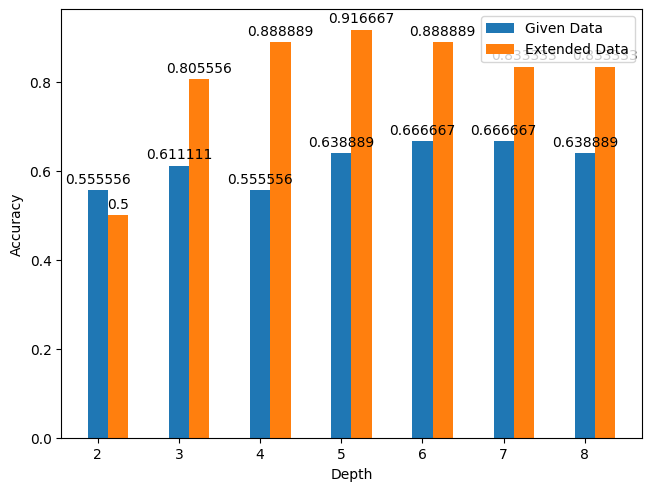

In [93]:
# Plotting and comparing with Raw Data

depth = list(range(2,9))
accuracies_data = {
    'Given Data' : accuracies[2:9],
    'Extended Data' : accuracies_new
}

x = np.arange(len(depth)) + 2
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in accuracies_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Question 7 : \
As depicted, in the Confusion Matrix model misclassifies "Walking upstairs" into "Walking Downstairs" and vice-versa. The datapoints for these two activities are highly correlated with each other. This is also evident from the waveforms plotted in Question 1. Due to this, the model fails to learn decsion boundaries between these two activities and misclassifies.

Deployment

In [78]:
# Generating Test Dataset

folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir_d = os.path.join("Deployment")

X_test_deploy=[]
y_test_deploy=[]
dataset_dir_d = os.path.join(combined_dir_d,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir_d,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir_d,folder,file),sep=",",header=0)
        df = df.drop(['time','TgF'],axis=1)
        df =  df[1500:2000]

        X_test_deploy.append(df.values)
        y_test_deploy.append(classes[folder])

X_test_deploy = np.array(X_test_deploy)
y_test_deploy = np.array(y_test_deploy)

In [ ]:
# Deployment Training Data
X_train_deploy = X_train
y_train_deploy = y_train

In [ ]:
# Adjusting the shapes
X_train_deploy_flatted = X_train_deploy.reshape(X_train.shape[0], X_train_deploy.shape[1]*X_train_deploy.shape[2])
X_test_deploy_flatted = X_test_deploy.reshape(X_test_deploy.shape[0], X_test_deploy.shape[1]*X_test_deploy.shape[2])

In [ ]:
# Building Test Dataframes for Plotting
X_test_deploy_df = pd.DataFrame(X_test_deploy_flatted)
y_test_deploy_df = pd.DataFrame(y_test_deploy, columns = ['Activity'])
Data_test = pd.concat([X_test_deploy_df, y_test_deploy_df], axis=1)

Legends : 
Orange : Acceleration - x
Green : Acceleration - y
Blue : Acceleration - z


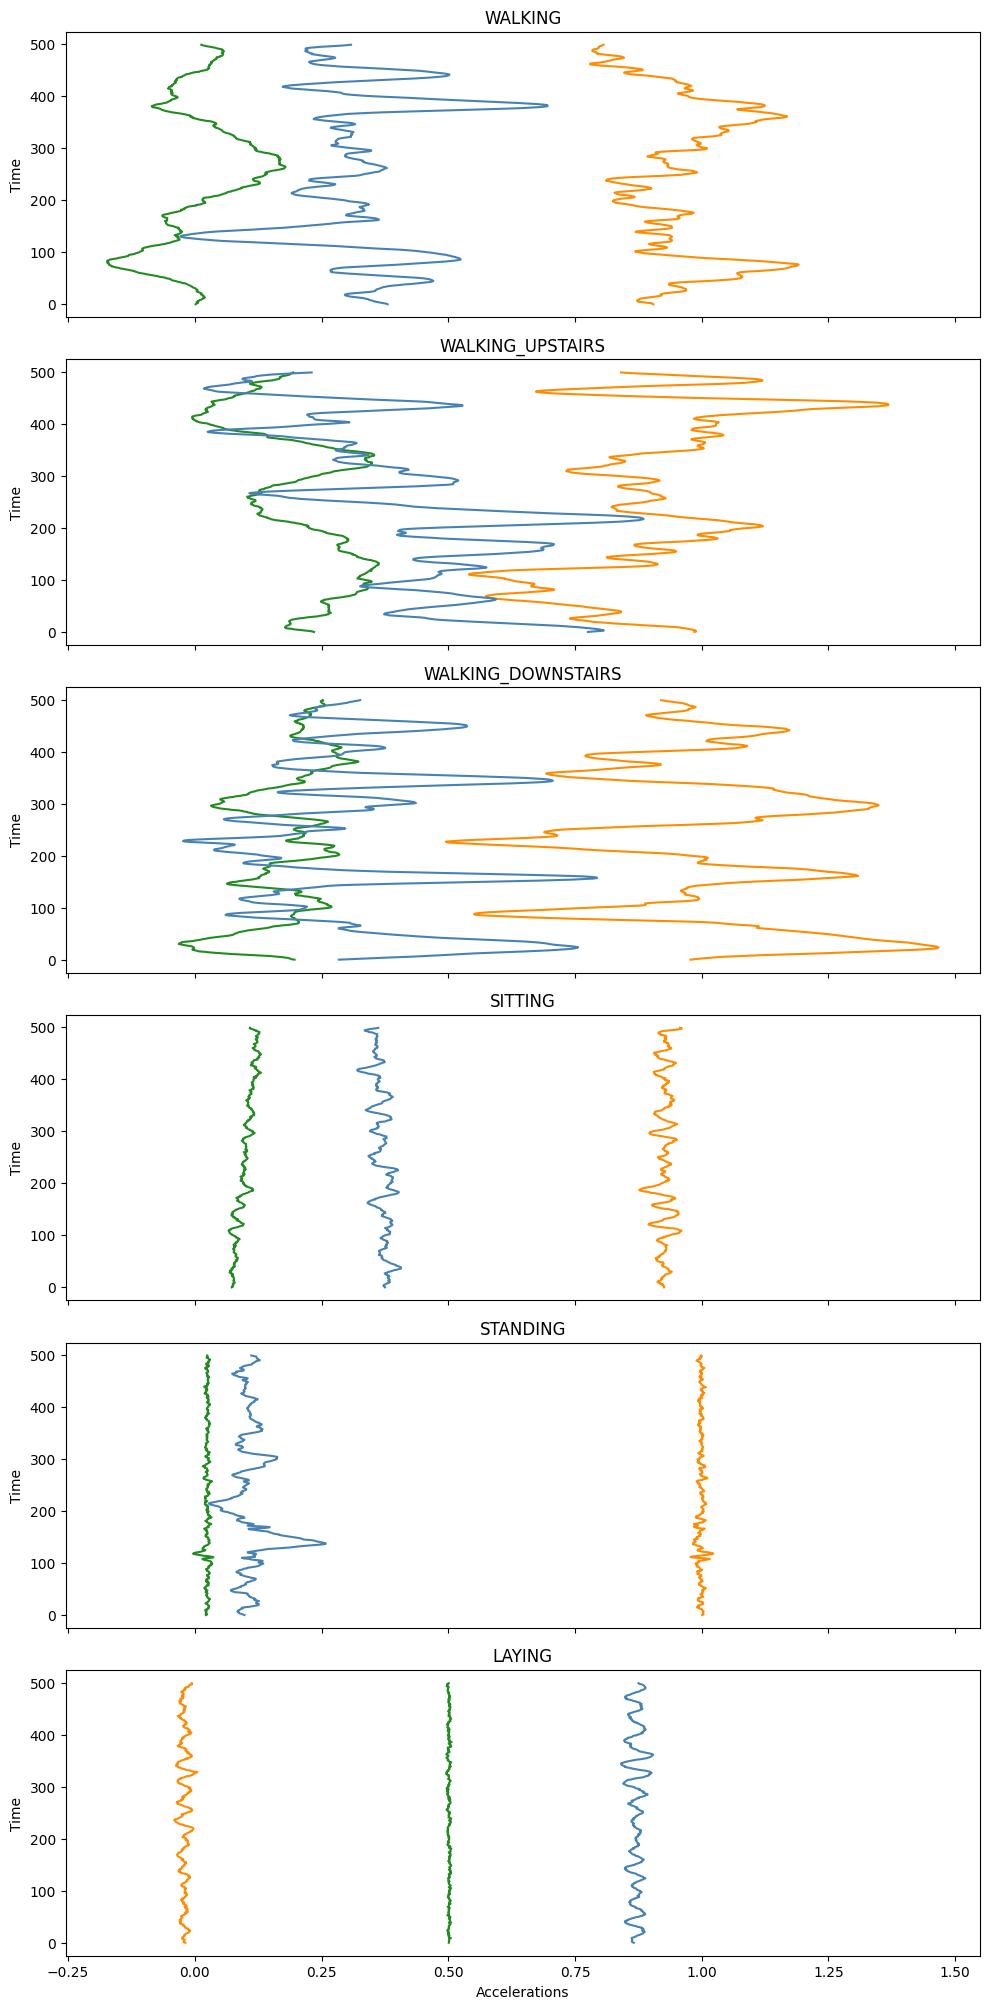

In [ ]:
# Plotting Test Data
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
names = list(classes.keys())
values = list(classes.values())

def get_activity_name(i):
    return names[values.index(i)]
print("Legends : ")
print("Orange : Acceleration - x")
print("Green : Acceleration - y")
print("Blue : Acceleration - z")
fig, axes = plt.subplots(6, 1, sharex=True, figsize = (10,20))
nof_participants = 1
for j in range(len(classes)):
    ind = Data_test.where(Data_test['Activity'] == j+1).dropna().index[1:nof_participants+1]
    axes[j].set_title(get_activity_name(j+1))
    for i in range(nof_participants):
        time = np.arange(i * len(X_test_deploy[0][:, 0]), i * len(X_test_deploy[0][:, 0]) + len(X_test_deploy[0][:, 0]))
        axes[j].plot(X_test_deploy[ind[i]][:, 0], time, c='darkorange')
        axes[j].plot(X_test_deploy[ind[i]][:, 1], time, c='forestgreen')
        axes[j].plot(X_test_deploy[ind[i]][:, 2], time, c='steelblue')
        axes[j].set_ylabel("Time")
plt.tight_layout()  
plt.xlabel("Accelerations")
plt.show()

In [92]:
# Training the model  
model = tree.DecisionTreeClassifier()
model.fit(X_train_deploy_flatted, y_train_deploy)
y_hat = model.predict(X_test_deploy_flatted)

# Accuracy and Confusion Matrix
print("Accuracy : ",metrics.accuracy_score(y_test_deploy, y_hat))
print("\n Confusion Matrix")
print(metrics.confusion_matrix(y_test_deploy, y_hat))

Accuracy :  0.4444444444444444

 Confusion Matrix
[[1 0 0 2 0 0]
 [0 0 0 3 0 0]
 [0 0 1 1 1 0]
 [0 0 0 3 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 0 3]]


In [ ]:
cfg_file = tsfel.get_features_by_domain()
X_train_deploy_extended = []
for i in range(len(X_train_deploy)):
    X_ = tsfel.time_series_features_extractor(cfg_file, X_train_deploy[i][:], fs = 50, window_size = 250)
    X_train_deploy_extended.append(np.array(X_.head(1)).reshape(X_.head(1).shape[1]))
X_train_deploy_extended = np.array(X_train_deploy_extended)

In [ ]:
cfg_file = tsfel.get_features_by_domain()
X_test_deploy_extended = []
for i in range(len(X_test_deploy)):
    X_ = tsfel.time_series_features_extractor(cfg_file, X_test_deploy[i][:], fs = 50, window_size = 250)
    X_test_deploy_extended.append(np.array(X_.head(1)).reshape(X_.head(1).shape[1]))
X_test_deploy_extended = np.array(X_test_deploy_extended)

In [82]:
X_train_deploy_extended_new = np.concatenate((X_train_deploy_flatted, X_train_deploy_extended), axis = 1)
X_test_deploy_extended_new = np.concatenate((X_test_deploy_flatted, X_test_deploy_extended), axis = 1)

In [104]:
# Training the model on Extended data using TSEFL
model = tree.DecisionTreeClassifier()
model.fit(X_train_deploy_extended_new, y_train)

# Predicting on Test Data
y_hat = model.predict(X_test_deploy_extended_new)

# Printing Accuracy and Confusion Matrix 
print("Accuracy : ",metrics.accuracy_score(y_test_deploy, y_hat))
print("\n Confusion Matrix")
Confusion_matrix_deploy = metrics.confusion_matrix(y_test_deploy, y_hat)
print(Confusion_matrix_deploy)

Accuracy :  0.5555555555555556

 Confusion Matrix
[[0 1 0 2 0 0]
 [0 3 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 0 3]]


The model gives accuracy of $0.5$ on the test dataset. On analyzing the Confusion Matrix, we see that Model confuses within the Dynamic & Static activities. For example, model classifies "Walking_Upstairs" into "Walking_Downstairs". We can look at the performance of model in classifying Activities into Dynamic and Static categories as below :  

In [105]:
# Dynamic Activities 

no_of_samples = 18

Dynamic_trues = 0
for i in range(3):
    for j in range(3): 
        Dynamic_trues += Confusion_matrix_deploy[i][j]

Static_trues = 0
for i in range(3,6):
    for j in range(3,6): 
        Static_trues += Confusion_matrix_deploy[i][j]

print("Category Accuracy Dynamic : ",2*Dynamic_trues/no_of_samples)
print("Category Accuracy Static : ",2*Static_trues/no_of_samples)

Category Accuracy Dynamic :  0.7777777777777778
Category Accuracy Static :  1.0


Clearly, the model could differentiate between the Dyanamic and Static activities. But, within that it misclassifies the activites belonging to same category (Dynamic/Static). This is probably because, with only acceration as feature it is hard to model the human  activity and due to the variations in Data collection method.